In [ ]:
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

gni 논문지 중에서 최근 3년간 (2018~2020) most cited, most downloaded, most viewed 논문의 요약본 총 58개를 직접 다운받았다.

In [ ]:
import os
file_list=[]
for file in os.listdir('C:/Users/judy9/Desktop/Genomics & Informatics'):
    file_list.append(file)
    print(file)
file_list

gni-1.txt
gni-10.txt
gni-11.txt
gni-12.txt
gni-13.txt
gni-14.txt
gni-15.txt
gni-16.txt
gni-17.txt
gni-18.txt
gni-19.txt
gni-2.txt
gni-20.txt
gni-21.txt
gni-22.txt
gni-23.txt
gni-24.txt
gni-25.txt
gni-26.txt
gni-27.txt
gni-28.txt
gni-29.txt
gni-3.txt
gni-30.txt
gni-31.txt
gni-32.txt
gni-33.txt
gni-34.txt
gni-35.txt
gni-36.txt
gni-37.txt
gni-38.txt
gni-39.txt
gni-4.txt
gni-40.txt
gni-41.txt
gni-42.txt
gni-43.txt
gni-44.txt
gni-45.txt
gni-46.txt
gni-47.txt
gni-48.txt
gni-49.txt
gni-5.txt
gni-50.txt
gni-51.txt
gni-52.txt
gni-53.txt
gni-54.txt
gni-55.txt
gni-56.txt
gni-57.txt
gni-58.txt
gni-6.txt
gni-7.txt
gni-8.txt
gni-9.txt


['gni-1.txt',
 'gni-10.txt',
 'gni-11.txt',
 'gni-12.txt',
 'gni-13.txt',
 'gni-14.txt',
 'gni-15.txt',
 'gni-16.txt',
 'gni-17.txt',
 'gni-18.txt',
 'gni-19.txt',
 'gni-2.txt',
 'gni-20.txt',
 'gni-21.txt',
 'gni-22.txt',
 'gni-23.txt',
 'gni-24.txt',
 'gni-25.txt',
 'gni-26.txt',
 'gni-27.txt',
 'gni-28.txt',
 'gni-29.txt',
 'gni-3.txt',
 'gni-30.txt',
 'gni-31.txt',
 'gni-32.txt',
 'gni-33.txt',
 'gni-34.txt',
 'gni-35.txt',
 'gni-36.txt',
 'gni-37.txt',
 'gni-38.txt',
 'gni-39.txt',
 'gni-4.txt',
 'gni-40.txt',
 'gni-41.txt',
 'gni-42.txt',
 'gni-43.txt',
 'gni-44.txt',
 'gni-45.txt',
 'gni-46.txt',
 'gni-47.txt',
 'gni-48.txt',
 'gni-49.txt',
 'gni-5.txt',
 'gni-50.txt',
 'gni-51.txt',
 'gni-52.txt',
 'gni-53.txt',
 'gni-54.txt',
 'gni-55.txt',
 'gni-56.txt',
 'gni-57.txt',
 'gni-58.txt',
 'gni-6.txt',
 'gni-7.txt',
 'gni-8.txt',
 'gni-9.txt']

In [ ]:
import os
gni_title_list=[]
for file in os.listdir('C:/Users/judy9/Desktop/Genomics & Informatics'):
    f=open('C:/Users/judy9/Desktop/Genomics & Informatics/'+file,'r',encoding='utf-8-sig')
    title=f.readline()
    print(title)
    gni_title_list.append(title)
f.close()
gni_title_list

Statistical analysis of metagenomics data 

GNI Corpus Version 1.0: Annotated Full-Text Corpus of Genomics & Informatics to Support Biomedical Information Extraction

An Advanced Understanding of Uterine Microbial Ecology Associated with Metritis in Dairy Cows

Genetic Hearing Loss and Gene Therapy

Functional Prediction of Hypothetical Proteins from Shigella flexneri and Validation of the Predicted Models by Using ROC Curve Analysis

Insights of window-based mechanism approach to visualize composite bioData point in feature spaces

Comparison of the Genetic Alterations between Primary Colorectal Cancers and Their Corresponding Patient-Derived Xenograft Tissues

Identification of ERBB Pathway-Activated Cells in Triple-Negative Breast Cancer

Resources for assigning MeSH IDs to Japanese medical terms

Comparison of the MGISEQ-2000 and Illumina HiSeq 4000 sequencing platforms for RNA sequencing

Review of statistical methods for survival analysis using genomic data

Antibacterial and Pha

['Statistical analysis of metagenomics data \n',
 'GNI Corpus Version 1.0: Annotated Full-Text Corpus of Genomics & Informatics to Support Biomedical Information Extraction\n',
 'An Advanced Understanding of Uterine Microbial Ecology Associated with Metritis in Dairy Cows\n',
 'Genetic Hearing Loss and Gene Therapy\n',
 'Functional Prediction of Hypothetical Proteins from Shigella flexneri and Validation of the Predicted Models by Using ROC Curve Analysis\n',
 'Insights of window-based mechanism approach to visualize composite bioData point in feature spaces\n',
 'Comparison of the Genetic Alterations between Primary Colorectal Cancers and Their Corresponding Patient-Derived Xenograft Tissues\n',
 'Identification of ERBB Pathway-Activated Cells in Triple-Negative Breast Cancer\n',
 'Resources for assigning MeSH IDs to Japanese medical terms\n',
 'Comparison of the MGISEQ-2000 and Illumina HiSeq 4000 sequencing platforms for RNA sequencing\n',
 'Review of statistical methods for surviva

In [ ]:
len(gni_title_list)

58

In [ ]:
gni_content_list=[]
for file in os.listdir('C:/Users/judy9/Desktop/Genomics & Informatics'):
    f=open('C:/Users/judy9/Desktop/Genomics & Informatics/'+file,'r',encoding='utf-8-sig')
    content=f.read()
    print(content)
    f=open('gni_content_list.txt','a',encoding='utf-8')
    f.write(content+'\n BREAKS HERE')
    gni_content_list.append(content+'\n BREAKS HERE')
f.close()
gni_content_list

Statistical analysis of metagenomics data 

 Understanding the role of the microbiome in human health and how it can be modulated is becoming increasingly relevant for preventive medicine and for the medical management of chronic diseases. The development of high-throughput sequencing technologies has boosted microbiome research through the study of microbial genomes and allowing a more precise quantification of microbiome abundances and function. Microbiome data analysis is challenging because it involves high-dimensional structured multivariate sparse data and because of its compositional nature. In this review we outline some of the procedures that are most commonly used for microbiome analysis and that are implemented in R packages. We place particular emphasis on the compositional structure of microbiome data. We describe the principles of compositional data analysis and distinguish between standard methods and those that fit into compositional data analysis.
GNI Corpus Version 1.

We hope that this will be an opportunity for the readers of the journal Genomics & Informatics to get aware of the state-of-the-art activities regarding interoperability of biomedical text mining, and at the same time to observe activities of hackathons like BLAH.
Evaluation and Interpretation of Transcriptome Data Underlying Heterogeneous Chronic Obstructive Pulmonary Disease

Chronic obstructive pulmonary disease (COPD) is a type of progressive lung disease, featured by airflow obstruction. Recently, a comprehensive analysis of the transcriptome in lung tissue of COPD patients was performed, but the heterogeneity of the sample was not seriously considered in characterizing the mechanistic dysregulation of COPD. Here, we established a new transcriptome analysis pipeline using a deconvolution process to reduce the heterogeneity and clearly identified that these transcriptome data originated from the mild or moderate stage of COPD patients. Differentially expressed or co-expressed genes

['Statistical analysis of metagenomics data \n\n Understanding the role of the microbiome in human health and how it can be modulated is becoming increasingly relevant for preventive medicine and for the medical management of chronic diseases. The development of high-throughput sequencing technologies has boosted microbiome research through the study of microbial genomes and allowing a more precise quantification of microbiome abundances and function. Microbiome data analysis is challenging because it involves high-dimensional structured multivariate sparse data and because of its compositional nature. In this review we outline some of the procedures that are most commonly used for microbiome analysis and that are implemented in R packages. We place particular emphasis on the compositional structure of microbiome data. We describe the principles of compositional data analysis and distinguish between standard methods and those that fit into compositional data analysis.\n BREAKS HERE',
 

In [ ]:
len(gni_content_list)

58

# Stopwords, stemming, and tokenizing

In [ ]:
gni_title_list

['Statistical analysis of metagenomics data \n',
 'GNI Corpus Version 1.0: Annotated Full-Text Corpus of Genomics & Informatics to Support Biomedical Information Extraction\n',
 'An Advanced Understanding of Uterine Microbial Ecology Associated with Metritis in Dairy Cows\n',
 'Genetic Hearing Loss and Gene Therapy\n',
 'Functional Prediction of Hypothetical Proteins from Shigella flexneri and Validation of the Predicted Models by Using ROC Curve Analysis\n',
 'Insights of window-based mechanism approach to visualize composite bioData point in feature spaces\n',
 'Comparison of the Genetic Alterations between Primary Colorectal Cancers and Their Corresponding Patient-Derived Xenograft Tissues\n',
 'Identification of ERBB Pathway-Activated Cells in Triple-Negative Breast Cancer\n',
 'Resources for assigning MeSH IDs to Japanese medical terms\n',
 'Comparison of the MGISEQ-2000 and Illumina HiSeq 4000 sequencing platforms for RNA sequencing\n',
 'Review of statistical methods for surviva

In [ ]:
data=open('gni_title_list.txt','r',encoding='utf-8')
lines=data.read()
data.close()
print(lines)

Statistical analysis of metagenomics data \n,
GNI Corpus Version 1.0: Annotated Full-Text Corpus of Genomics & Informatics to Support Biomedical Information Extraction\n,
An Advanced Understanding of Uterine Microbial Ecology Associated with Metritis in Dairy Cows\n,
Genetic Hearing Loss and Gene Therapy\n,
Functional Prediction of Hypothetical Proteins from Shigella flexneri and Validation of the Predicted Models by Using ROC Curve Analysis\n,
Insights of window-based mechanism approach to visualize composite bioData point in feature spaces\n,
Comparison of the Genetic Alterations between Primary Colorectal Cancers and Their Corresponding Patient-Derived Xenograft Tissues\n,
Identification of ERBB Pathway-Activated Cells in Triple-Negative Breast Cancer\n,
Resources for assigning MeSH IDs to Japanese medical terms\n,
Comparison of the MGISEQ-2000 and Illumina HiSeq 4000 sequencing platforms for RNA sequencing\n,
Review of statistical methods for survival analysis using genomic data\n,

In [ ]:
#import lists: titles, and content
titles = lines.split('\n')
#read all as list
titles

['Statistical analysis of metagenomics data \\n,',
 'GNI Corpus Version 1.0: Annotated Full-Text Corpus of Genomics & Informatics to Support Biomedical Information Extraction\\n,',
 'An Advanced Understanding of Uterine Microbial Ecology Associated with Metritis in Dairy Cows\\n,',
 'Genetic Hearing Loss and Gene Therapy\\n,',
 'Functional Prediction of Hypothetical Proteins from Shigella flexneri and Validation of the Predicted Models by Using ROC Curve Analysis\\n,',
 'Insights of window-based mechanism approach to visualize composite bioData point in feature spaces\\n,',
 'Comparison of the Genetic Alterations between Primary Colorectal Cancers and Their Corresponding Patient-Derived Xenograft Tissues\\n,',
 'Identification of ERBB Pathway-Activated Cells in Triple-Negative Breast Cancer\\n,',
 'Resources for assigning MeSH IDs to Japanese medical terms\\n,',
 'Comparison of the MGISEQ-2000 and Illumina HiSeq 4000 sequencing platforms for RNA sequencing\\n,',
 'Review of statistical

In [ ]:
len(titles)

58

In [ ]:
data=open('gni_content_list.txt','r',encoding='utf-8')
lines=data.read()
data.close()
print(lines)

Statistical analysis of metagenomics data 

 Understanding the role of the microbiome in human health and how it can be modulated is becoming increasingly relevant for preventive medicine and for the medical management of chronic diseases. The development of high-throughput sequencing technologies has boosted microbiome research through the study of microbial genomes and allowing a more precise quantification of microbiome abundances and function. Microbiome data analysis is challenging because it involves high-dimensional structured multivariate sparse data and because of its compositional nature. In this review we outline some of the procedures that are most commonly used for microbiome analysis and that are implemented in R packages. We place particular emphasis on the compositional structure of microbiome data. We describe the principles of compositional data analysis and distinguish between standard methods and those that fit into compositional data analysis.
 BREAKS HEREGNI Corpu

In [ ]:
content=lines.split('\n BREAKS HERE')

In [ ]:
content

['Statistical analysis of metagenomics data \n\n Understanding the role of the microbiome in human health and how it can be modulated is becoming increasingly relevant for preventive medicine and for the medical management of chronic diseases. The development of high-throughput sequencing technologies has boosted microbiome research through the study of microbial genomes and allowing a more precise quantification of microbiome abundances and function. Microbiome data analysis is challenging because it involves high-dimensional structured multivariate sparse data and because of its compositional nature. In this review we outline some of the procedures that are most commonly used for microbiome analysis and that are implemented in R packages. We place particular emphasis on the compositional structure of microbiome data. We describe the principles of compositional data analysis and distinguish between standard methods and those that fit into compositional data analysis.',
 'GNI Corpus Ve

In [ ]:
len(content) #마지막 element 는 비어있는 스트링

59

In [ ]:
# generates index for each item in the corpora (in this case it's just rank) and I'll use this for scoring later
ranks = []

for i in range(0,len(gni_title_list)):
    ranks.append(i)

In [ ]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [ ]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in gni_content_list:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [ ]:
print(totalvocab_tokenized[:20])
print(totalvocab_stemmed[:20])

['statistical', 'analysis', 'of', 'metagenomics', 'data', 'understanding', 'the', 'role', 'of', 'the', 'microbiome', 'in', 'human', 'health', 'and', 'how', 'it', 'can', 'be', 'modulated']
['statist', 'analysi', 'of', 'metagenom', 'data', 'understand', 'the', 'role', 'of', 'the', 'microbiom', 'in', 'human', 'health', 'and', 'how', 'it', 'can', 'be', 'modul']


위의 결과를 봤을 때 SnowballStemmer는 statistical, analysis, genomics 등을 하나의 독립된 단어로 인식하지 않는다

from nltk.stem.lancaster import LancasterStemmer 

stemmer = LancasterStemmer()

위의 lancasterstemmer로 시도해본 결과 snowball이 더 좋은 성능을 보였음

In [ ]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [ ]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in gni_content_list:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [ ]:
print(totalvocab_tokenized[:20])
print(totalvocab_stemmed[:20])

['statistical', 'analysis', 'of', 'metagenomics', 'data', 'understanding', 'the', 'role', 'of', 'the', 'microbiome', 'in', 'human', 'health', 'and', 'how', 'it', 'can', 'be', 'modulated']
['statist', 'analysi', 'of', 'metagenom', 'data', 'understand', 'the', 'role', 'of', 'the', 'microbiom', 'in', 'human', 'health', 'and', 'how', 'it', 'can', 'be', 'modul']


In [ ]:
# import these modules 
from nltk.stem import WordNetLemmatizer 
  
stemmer = WordNetLemmatizer() 

In [ ]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.lemmatize(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [ ]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in gni_content_list:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [ ]:
print(totalvocab_tokenized[:20])
print(totalvocab_stemmed[:20])

['statistical', 'analysis', 'of', 'metagenomics', 'data', 'understanding', 'the', 'role', 'of', 'the', 'microbiome', 'in', 'human', 'health', 'and', 'how', 'it', 'can', 'be', 'modulated']
['Statistical', 'analysis', 'of', 'metagenomics', 'data', 'Understanding', 'the', 'role', 'of', 'the', 'microbiome', 'in', 'human', 'health', 'and', 'how', 'it', 'can', 'be', 'modulated']


3가지의 어원찾기 종류를 비교한 결과 lemmatizer가 성능이 가장 좋았다

In [ ]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

In [ ]:
type(vocab_frame)
vocab_frame

,words
Statistical,statistical
analysis,analysis
of,of
metagenomics,metagenomics
data,data
...,...
month,months
of,of
age,age
BREAKS,breaks


## Tf-idf and document similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(gni_content_list)

print(tfidf_matrix.shape)

C:\Users\judy9\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Wall time: 716 ms
(58, 23)


In [ ]:
terms = tfidf_vectorizer.get_feature_names()
terms

['analysis',
 'approach',
 'data',
 'development',
 'disease',
 'expression',
 'function',
 'gene',
 'ha',
 'important',
 'method',
 'recent',
 'research',
 'review',
 'role',
 'sequencing',
 'study',
 'tool',
 'type',
 'used',
 'using',
 'various',
 'wa']

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

# K-means clustering

Now onto the fun part. Using the tf-idf matrix, you can run a slew of clustering algorithms to better understand the hidden structure within the synopses. I first chose [k-means](http://en.wikipedia.org/wiki/K-means_clustering). K-means initializes with a pre-determined number of clusters (I chose 5). Each observation is assigned to a cluster (cluster assignment) so as to minimize the within cluster sum of squares. Next, the mean of the clustered observations is calculated and used as the new cluster centroid. Then, observations are reassigned to clusters and  centroids recalculated in an iterative process until the algorithm reaches convergence.

I found it took several runs for the algorithm to converge a global optimum as k-means is susceptible to reaching local optima. 

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 7

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 145 ms


In [ ]:
from sklearn.externals import joblib

joblib.dump(km,  'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

C:\Users\judy9\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import pandas as pd

gnis = { 'title': gni_title_list, 'rank': ranks, 'content': gni_content_list, 'cluster': clusters}

frame = pd.DataFrame(gnis, index = [clusters] , columns = ['rank', 'title', 'cluster'])

In [ ]:
frame['cluster'].value_counts()

2    12
4     9
3     9
6     8
0     8
1     7
5     5
Name: cluster, dtype: int64

In [ ]:
grouped = frame['rank'].groupby(frame['cluster'])

grouped.mean()

cluster
0    26.875000
1    29.571429
2    27.416667
3    32.000000
4    30.222222
5    28.200000
6    25.125000
Name: rank, dtype: float64

In [ ]:
from __future__ import print_function

print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words: b'expression', b'study', b'types', b'role', b'various', b'development',

Cluster 0 titles: GNI Corpus Version 1.0: Annotated Full-Text Corpus of Genomics & Informatics to Support Biomedical Information Extraction
, MicroRNAs in Autoimmune Sjögren’s Syndrome
, Insights into the signal transduction pathways of mouse lung type II cells revealed by transcription factor profiling in the transcriptome
, Roles of Oncogenic Long Non-coding RNAs in Cancer Development
, Association of mitochondrial haplogroup F with physical performance in korean population
, DNA methylation: a cause and consequence of type 2 diabetes
, Circulating HOTAIR LncRNA Is Potentially Up-regulated in Coronary Artery Disease
, System-Wide Expression and Function of Olfactory Receptors in Mammals
,

Cluster 1 words: b'approaches', b'using', b'review', b'was', b'research', b'tools',

Cluster 1 titles: Insights of window-based mechanism approach to visualize composite bioData point i

In [ ]:
#This is purely to help export tables to html and to correct for my 0 start rank (so that Godfather is 1, not 0)
frame['Rank'] = frame['rank'] + 1
frame['Title'] = frame['title']

# Multidimensional scaling

In [ ]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [ ]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [ ]:
file_list

['gni-1.txt',
 'gni-10.txt',
 'gni-11.txt',
 'gni-12.txt',
 'gni-13.txt',
 'gni-14.txt',
 'gni-15.txt',
 'gni-16.txt',
 'gni-17.txt',
 'gni-18.txt',
 'gni-19.txt',
 'gni-2.txt',
 'gni-20.txt',
 'gni-21.txt',
 'gni-22.txt',
 'gni-23.txt',
 'gni-24.txt',
 'gni-25.txt',
 'gni-26.txt',
 'gni-27.txt',
 'gni-28.txt',
 'gni-29.txt',
 'gni-3.txt',
 'gni-30.txt',
 'gni-31.txt',
 'gni-32.txt',
 'gni-33.txt',
 'gni-34.txt',
 'gni-35.txt',
 'gni-36.txt',
 'gni-37.txt',
 'gni-38.txt',
 'gni-39.txt',
 'gni-4.txt',
 'gni-40.txt',
 'gni-41.txt',
 'gni-42.txt',
 'gni-43.txt',
 'gni-44.txt',
 'gni-45.txt',
 'gni-46.txt',
 'gni-47.txt',
 'gni-48.txt',
 'gni-49.txt',
 'gni-5.txt',
 'gni-50.txt',
 'gni-51.txt',
 'gni-52.txt',
 'gni-53.txt',
 'gni-54.txt',
 'gni-55.txt',
 'gni-56.txt',
 'gni-57.txt',
 'gni-58.txt',
 'gni-6.txt',
 'gni-7.txt',
 'gni-8.txt',
 'gni-9.txt']

## Visualizing document clusters

In [ ]:
#set up colors per clusters using a dict
cluster_colors = {0: '#f00c0c', 1: '#f08c22', 2: '#fcf74e', 3: '#0f941c', 4: '#253dd9', 5: '#9f43f0', 6: '#fa02d1'}

#set up cluster names using a dict
cluster_names = {0: 'expression, study, types, role, various, development', 
                 1: 'approaches, using, review, research, tools', 
                 2: 'data, sequencing, using, analysis', 
                 3: 'methods, data, analysis, important',
                 4: 'genes, analysis, important, using, sequencing',
                 5: 'diseases, recent, study, function, approaches, development',
                 6: 'analysis, study, developement'
                }

In [ ]:
%matplotlib inline

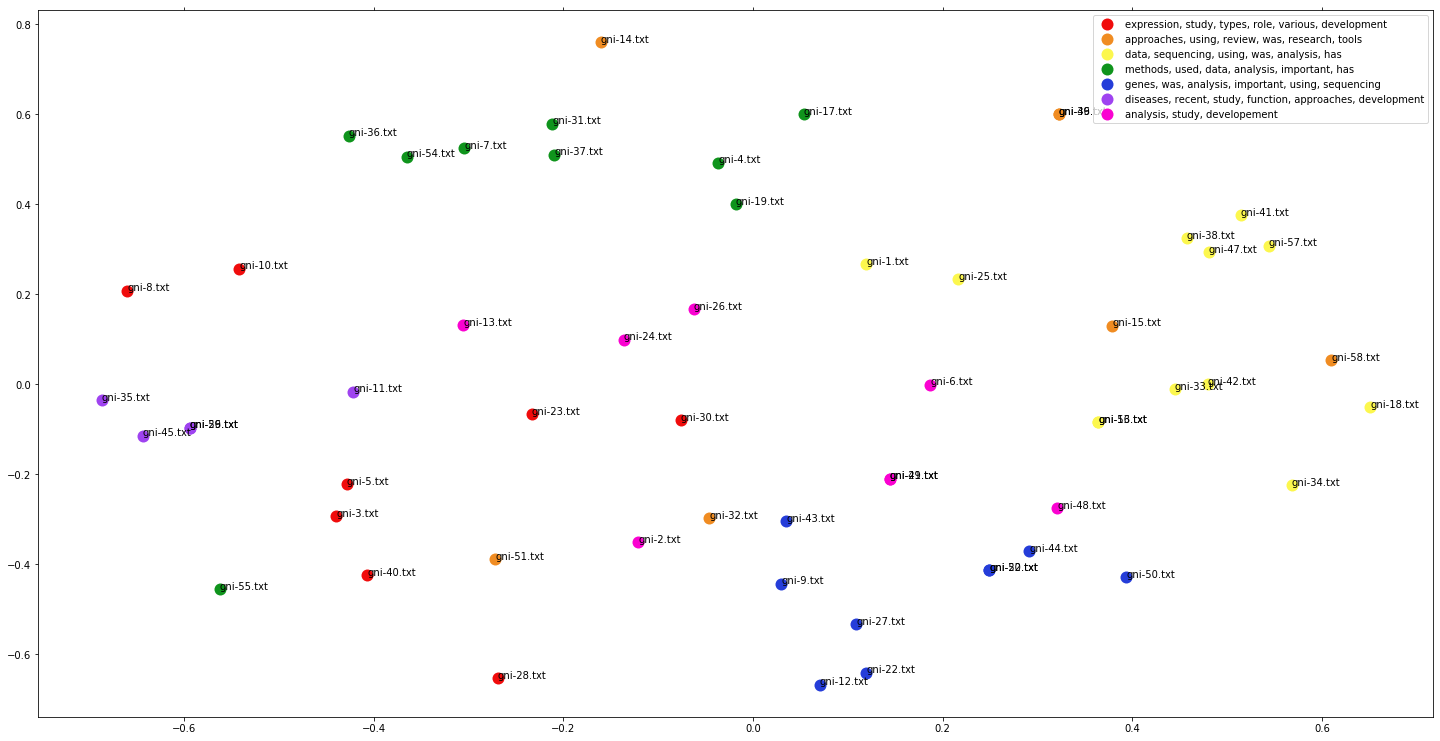

<Figure size 432x288 with 0 Axes>

In [ ]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=file_list)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(25, 13)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=10)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
plt.savefig('clusters_small_noaxes.pdf',bbox_inches='tight')

In [ ]:
plt.close()

# Genomics & Informatics 의 most cited, downloaded, viewed 논문 58개 중에서 특수용어 추출하기

In [ ]:
from nltk.corpus import *

In [ ]:
corpus_root='C:/Users/judy9/Desktop/Genomics & Informatics/'

In [ ]:
GNICorpus = PlaintextCorpusReader(corpus_root,'.*\.txt',encoding='utf-8')

In [ ]:
gniRaw=GNICorpus.raw()

### 알파벳으로 시작하고 숫자로 끝나는 용어들 : 대부분 gene 관련 용어들 추출

In [ ]:
pattern = re.findall(r'[a-zA-Z]+\d+', gniRaw)

In [ ]:
pattern

['ERBB2',
 'ESR1',
 'LD50',
 'IGC50',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'AFG1',
 'RIMS1',
 'ZNF280',
 'BAIAP2',
 'LRTM2',
 'GABRA5',
 'PCDH15',
 'HERC1',
 'DTNBP1',
 'SLIT2',
 'TRAPPC9',
 'APBB2',
 'ABL2',
 'NOX4',
 'MKLN1',
 'ZNF280',
 'BAIAP2',
 'DNAAF1',
 'LRTM2',
 'PCDH15',
 'MYH9',
 'APBB2',
 'DTNBP1',
 'TRIM62',
 'SLIT2',
 'MKLN1',
 'BAIAP2',
 'PCDH15',
 'BCAS3',
 'MYH9',
 'DTNBP1',
 'ABL2',
 'ADD2',
 'SLIT2',
 'N50',
 'AP1',
 'Srebf1',
 'Stat3',
 'Klf5',
 'Elf3',
 'Sox9',
 'B1',
 'H660',
 'K562',
 'IMa3',
 'BLAH6',
 'T2',
 'T2',
 'T2',
 'T2',
 'T2',
 'T2',
 'T2',
 'BLAH6',
 'log2',
 'BLAH6',
 'BLAH6',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'BLAH6',
 'ERBB2',
 'ESR1',
 'BLAH6',
 'B1',
 'bio2',
 'F1',
 'BLAH6',
 'LEF1',
 'HumanOmni1',
 'rs4365796',
 'Thr369',
 'LEF1',
 'rs4365796',
 'LEF1',
 'LEF1']

In [ ]:
len(pattern)

93

In [ ]:
set(pattern) #중복 제거

{'ABL2',
 'ADD2',
 'AFG1',
 'AP1',
 'APBB2',
 'B1',
 'BAIAP2',
 'BCAS3',
 'BLAH6',
 'DNAAF1',
 'DTNBP1',
 'ERBB2',
 'ESR1',
 'Elf3',
 'F1',
 'GABRA5',
 'GSTM1',
 'H660',
 'HERC1',
 'HumanOmni1',
 'IGC50',
 'IMa3',
 'K562',
 'Klf5',
 'LD50',
 'LEF1',
 'LRTM2',
 'MKLN1',
 'MYH9',
 'N50',
 'NOX4',
 'PCDH15',
 'RIMS1',
 'SLIT2',
 'Sox9',
 'Srebf1',
 'Stat3',
 'T2',
 'TRAPPC9',
 'TRIM62',
 'Thr369',
 'ZNF280',
 'bio2',
 'log2',
 'rs4365796'}

In [ ]:
len(set(pattern)) #중복제거해서는 45개 용어 추출이 됨

45

In [ ]:
pattern

['ERBB2',
 'ESR1',
 'LD50',
 'IGC50',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'AFG1',
 'RIMS1',
 'ZNF280',
 'BAIAP2',
 'LRTM2',
 'GABRA5',
 'PCDH15',
 'HERC1',
 'DTNBP1',
 'SLIT2',
 'TRAPPC9',
 'APBB2',
 'ABL2',
 'NOX4',
 'MKLN1',
 'ZNF280',
 'BAIAP2',
 'DNAAF1',
 'LRTM2',
 'PCDH15',
 'MYH9',
 'APBB2',
 'DTNBP1',
 'TRIM62',
 'SLIT2',
 'MKLN1',
 'BAIAP2',
 'PCDH15',
 'BCAS3',
 'MYH9',
 'DTNBP1',
 'ABL2',
 'ADD2',
 'SLIT2',
 'N50',
 'AP1',
 'Srebf1',
 'Stat3',
 'Klf5',
 'Elf3',
 'Sox9',
 'B1',
 'H660',
 'K562',
 'IMa3',
 'BLAH6',
 'T2',
 'T2',
 'T2',
 'T2',
 'T2',
 'T2',
 'T2',
 'BLAH6',
 'log2',
 'BLAH6',
 'BLAH6',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'GSTM1',
 'BLAH6',
 'ERBB2',
 'ESR1',
 'BLAH6',
 'B1',
 'bio2',
 'F1',
 'BLAH6',
 'LEF1',
 'HumanOmni1',
 'rs4365796',
 'Thr369',
 'LEF1',
 'rs4365796',
 'LEF1',
 'LEF1']

In [ ]:
# 중복되는 것을 count 해주어서 wordcloud 만들어보겠음

In [ ]:
import collections

In [ ]:
counter=collections.Counter(pattern)

In [ ]:
counter

Counter({'ERBB2': 2,
         'ESR1': 2,
         'LD50': 1,
         'IGC50': 1,
         'GSTM1': 16,
         'AFG1': 1,
         'RIMS1': 1,
         'ZNF280': 2,
         'BAIAP2': 3,
         'LRTM2': 2,
         'GABRA5': 1,
         'PCDH15': 3,
         'HERC1': 1,
         'DTNBP1': 3,
         'SLIT2': 3,
         'TRAPPC9': 1,
         'APBB2': 2,
         'ABL2': 2,
         'NOX4': 1,
         'MKLN1': 2,
         'DNAAF1': 1,
         'MYH9': 2,
         'TRIM62': 1,
         'BCAS3': 1,
         'ADD2': 1,
         'N50': 1,
         'AP1': 1,
         'Srebf1': 1,
         'Stat3': 1,
         'Klf5': 1,
         'Elf3': 1,
         'Sox9': 1,
         'B1': 2,
         'H660': 1,
         'K562': 1,
         'IMa3': 1,
         'BLAH6': 7,
         'T2': 7,
         'log2': 1,
         'bio2': 1,
         'F1': 1,
         'LEF1': 4,
         'HumanOmni1': 1,
         'rs4365796': 2,
         'Thr369': 1})

In [ ]:
# 이제 counter 은 빈도수까지 출력해주는 딕셔너리 형으로 변환되었다.

In [ ]:
from wordcloud import WordCloud

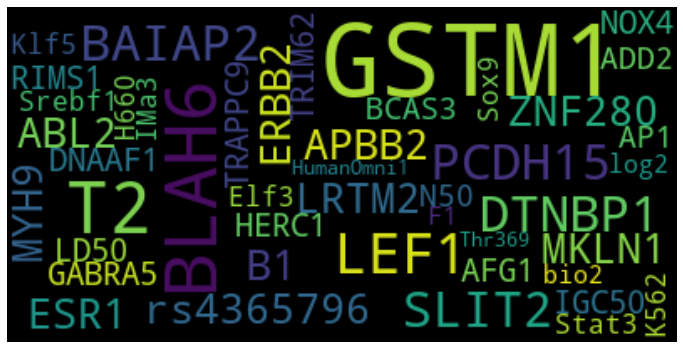

In [ ]:
wordcloud=WordCloud(max_font_size=60).generate_from_frequencies(counter)

plt.figure(figsize=(12,9))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

결과적으로 압도적으로 빈도수가 많은 GSTM1, BLAH6, T2 에 관해서 알아보겠다.

최근 3년간 most cited, downloaded, viewed 논문 중에서 특수용어 GSTM1가 많이 등장하는 논문을 가져오겠다.
하나의 논문에서 16번 등장했다면 Genomics & Informatics 에서 주목하고 있는 gene 이라고 볼 수 없을 것이며
여러개의 논문에서 고루 분포한다면 Genomics & Informatics 에서 주목하고 있는 gene 이라고 볼 수 있을 것이다.

In [ ]:
gni_content_list

['Statistical analysis of metagenomics data \n\n Understanding the role of the microbiome in human health and how it can be modulated is becoming increasingly relevant for preventive medicine and for the medical management of chronic diseases. The development of high-throughput sequencing technologies has boosted microbiome research through the study of microbial genomes and allowing a more precise quantification of microbiome abundances and function. Microbiome data analysis is challenging because it involves high-dimensional structured multivariate sparse data and because of its compositional nature. In this review we outline some of the procedures that are most commonly used for microbiome analysis and that are implemented in R packages. We place particular emphasis on the compositional structure of microbiome data. We describe the principles of compositional data analysis and distinguish between standard methods and those that fit into compositional data analysis.\n BREAKS HERE',
 

In [ ]:
for i in range(58):
    if 'GSTM1' in gni_content_list[i]:
        print(i)

13
43


In [ ]:
gni_content_list[13]

'Utility of Integrated Analysis of Pharmacogenomics and Pharmacometabolomics in Early Phase Clinical Trial: A Case Study of a New Molecular Entity\n\nIn this report, we present a case study of how pharmacogenomics and pharmacometabolomics can be useful to characterize safety and pharmacokinetic profiles in early phase new drug development clinical trials. During conducting a first-in-human trial for a new molecular entity, we were able to determine the mechanism of dichotomized variability in plasma drug concentrations, which appeared closely related to adverse drug reactions (ADRs) through integrated omics analysis. The pharmacogenomics screening was performed from whole blood samples using the Affymetrix DMET (Drug-Metabolizing Enzymes and Transporters) Plus microarray, and confirmation of genetic variants was performed using real-time polymerase chain reaction. Metabolomics profiling was performed from plasma samples using liquid chromatography coupled with quadrupole time-of-flight

In [ ]:
gni_content_list[43]

'Utility of Integrated Analysis of Pharmacogenomics and Pharmacometabolomics in Early Phase Clinical Trial: A Case Study of a New Molecular Entity\n\nIn this report, we present a case study of how pharmacogenomics and pharmacometabolomics can be useful to characterize safety and pharmacokinetic profiles in early phase new drug development clinical trials. During conducting a first-in-human trial for a new molecular entity, we were able to determine the mechanism of dichotomized variability in plasma drug concentrations, which appeared closely related to adverse drug reactions (ADRs) through integrated omics analysis. The pharmacogenomics screening was performed from whole blood samples using the Affymetrix DMET (Drug-Metabolizing Enzymes and Transporters) Plus microarray, and confirmation of genetic variants was performed using real-time polymerase chain reaction. Metabolomics profiling was performed from plasma samples using liquid chromatography coupled with quadrupole time-of-flight

gni 논문 중에서 most cited는 most downloaded이 될 수도 있고 most viewed이 될 수도 있는데 다운 받은 것 중에서 GSTM1 용어가 포함되는 논문 2 종류가 똑같은 논문이다.

---------- 여기서부터는 optional 로 수행한 것이며 기말 프로젝트 Genomics & Informatics 의 분석과는 직접적인 상관이 없습니다 -------------

## Disease Markers 의 최근 3년간 Special Issue 논문 요약본 50개 
### 직접 다운받은 후 클러스터링

In [ ]:
import os
dm_file_list=[]
for file in os.listdir('C:/Users/judy9/Desktop/Disease Markers'):
    dm_file_list.append(file)
    print(file)
dm_file_list

dm-1.txt
dm-10.txt
dm-11.txt
dm-12.txt
dm-13.txt
dm-14.txt
dm-15.txt
dm-16.txt
dm-17.txt
dm-18.txt
dm-19.txt
dm-2.txt
dm-20.txt
dm-21.txt
dm-22.txt
dm-23.txt
dm-24.txt
dm-25.txt
dm-26.txt
dm-27.txt
dm-28.txt
dm-29.txt
dm-3.txt
dm-31.txt
dm-32.txt
dm-33.txt
dm-34.txt
dm-35.txt
dm-36.txt
dm-37.txt
dm-38.txt
dm-39.txt
dm-4.txt
dm-40.txt
dm-41.txt
dm-42.txt
dm-43.txt
dm-44.txt
dm-45.txt
dm-46.txt
dm-47.txt
dm-48.txt
dm-49.txt
dm-5.txt
dm-50.txt
dm-6.txt
dm-7.txt
dm-8.txt
dm-9.txt


['dm-1.txt',
 'dm-10.txt',
 'dm-11.txt',
 'dm-12.txt',
 'dm-13.txt',
 'dm-14.txt',
 'dm-15.txt',
 'dm-16.txt',
 'dm-17.txt',
 'dm-18.txt',
 'dm-19.txt',
 'dm-2.txt',
 'dm-20.txt',
 'dm-21.txt',
 'dm-22.txt',
 'dm-23.txt',
 'dm-24.txt',
 'dm-25.txt',
 'dm-26.txt',
 'dm-27.txt',
 'dm-28.txt',
 'dm-29.txt',
 'dm-3.txt',
 'dm-31.txt',
 'dm-32.txt',
 'dm-33.txt',
 'dm-34.txt',
 'dm-35.txt',
 'dm-36.txt',
 'dm-37.txt',
 'dm-38.txt',
 'dm-39.txt',
 'dm-4.txt',
 'dm-40.txt',
 'dm-41.txt',
 'dm-42.txt',
 'dm-43.txt',
 'dm-44.txt',
 'dm-45.txt',
 'dm-46.txt',
 'dm-47.txt',
 'dm-48.txt',
 'dm-49.txt',
 'dm-5.txt',
 'dm-50.txt',
 'dm-6.txt',
 'dm-7.txt',
 'dm-8.txt',
 'dm-9.txt']

In [ ]:
import os
dm_title_list=[]
for file in os.listdir('C:/Users/judy9/Desktop/Disease Markers'):
    f=open('C:/Users/judy9/Desktop/Disease Markers/'+file,'r',encoding='utf-8-sig')
    title=f.readline()
    print(title)
    dm_title_list.append(title)
f.close()
dm_title_list

Progression of Aortic Arch Calcification Is Associated with Overall and Cardiovascular Mortality in Hemodialysis

A Trypanosoma cruzi Genome Tandem Repetitive Satellite DNA Sequence as a Molecular Marker for a LAMP Assay for Diagnosing Chagas’ Disease

Assessing the Prognostic Performance of the Child-Pugh, Model for End-Stage Liver Disease, and Albumin-Bilirubin Scores in Patients with Decompensated Cirrhosis: A Large Asian Cohort from Gastroenterology Department

Growth Differentiation Factor 15 in Children with Chronic Kidney Disease and after Renal Transplantation

Short-Term Prognosis Value of sST2 for an Unfavorable Outcome in Hypertensive Patients

Functional Characterization of a Missense Variant of MLH1 Identified in Lynch Syndrome Pedigree

New Insights into the Role of Tyro3, Axl, and Mer Receptors in Rheumatoid Arthritis

A Meta-Analysis of Robotic Surgery in Endometrial Cancer: Comparison with Laparoscopy and Laparotomy

The Accuracy of Single MicroRNAs in Peripheral Blood

['Progression of Aortic Arch Calcification Is Associated with Overall and Cardiovascular Mortality in Hemodialysis\n',
 'A Trypanosoma cruzi Genome Tandem Repetitive Satellite DNA Sequence as a Molecular Marker for a LAMP Assay for Diagnosing Chagas’ Disease\n',
 'Assessing the Prognostic Performance of the Child-Pugh, Model for End-Stage Liver Disease, and Albumin-Bilirubin Scores in Patients with Decompensated Cirrhosis: A Large Asian Cohort from Gastroenterology Department\n',
 'Growth Differentiation Factor 15 in Children with Chronic Kidney Disease and after Renal Transplantation\n',
 'Short-Term Prognosis Value of sST2 for an Unfavorable Outcome in Hypertensive Patients\n',
 'Functional Characterization of a Missense Variant of MLH1 Identified in Lynch Syndrome Pedigree\n',
 'New Insights into the Role of Tyro3, Axl, and Mer Receptors in Rheumatoid Arthritis\n',
 'A Meta-Analysis of Robotic Surgery in Endometrial Cancer: Comparison with Laparoscopy and Laparotomy\n',
 'The Accura

In [ ]:
dm_content_list=[]
for file in os.listdir('C:/Users/judy9/Desktop/Disease Markers'):
    f=open('C:/Users/judy9/Desktop/Disease Markers/'+file,'r',encoding='utf-8-sig')
    content=f.read()
    print(content)
    f=open('dm_content_list.txt','a',encoding='utf-8')
    f.write(content+'\n BREAKS HERE')
    dm_content_list.append(content+'\n BREAKS HERE')
f.close()
dm_content_list

Progression of Aortic Arch Calcification Is Associated with Overall and Cardiovascular Mortality in Hemodialysis

Background. Vascular calcification is common and associated with unfavorable outcomes among patients with end-stage renal disease (ESRD). Nevertheless, little is known whether the progression of vascular calcification outweighs the baseline calcification in association with overall and cardiovascular (CV) mortality in hemodialysis (HD) patients. Methods. This study included 140 maintenance HD patients. Vascular calcification was assessed using the aortic arch calcification (AoAC) score measured from chest radiographs at the baseline and the second year of follow-up. Progression of vascular calcification (ΔAoAC) was defined as the difference between the two measurements of AoAC. The association of ΔAoAC with overall and CV mortality was evaluated using multivariate Cox regression analysis. Results. During the mean follow-up period of 5.8 years, there were 49 (35%) overall mo

Hepatic Subcapsular Flow as a Significant Diagnostic Marker for Biliary Atresia: A Meta-Analysis

Aim. Increasing evidence indicates that hepatic subcapsular flow (HSF) can serve as a noninvasive ultrasonographic marker for the early diagnosis of biliary atresia (BA). However, results regarding its diagnostic accuracy are inconsistent and inconclusive. We conducted this meta-analysis with an aim to systematically evaluate the diagnostic value of HSF in predicting BA. Methods. A comprehensive literature search of four databases was conducted to identify the eligible studies. All analyses were performed using STATA 12.0. Results. Nine studies from eight articles containing 368 patients and 469 controls were included in our meta-analysis. Briefly, the values for pooled sensitivity, specificity, positive likelihood ratio (PLR), negative likelihood ratio (NLR), diagnostic odds ratio (DOR), and area under the curve (AUC) were 0.95 (95% CI 0.88-0.98), 0.92 (95% CI 0.85-0.96), 11.6 (95% CI 6.3

['Progression of Aortic Arch Calcification Is Associated with Overall and Cardiovascular Mortality in Hemodialysis\n\nBackground. Vascular calcification is common and associated with unfavorable outcomes among patients with end-stage renal disease (ESRD). Nevertheless, little is known whether the progression of vascular calcification outweighs the baseline calcification in association with overall and cardiovascular (CV) mortality in hemodialysis (HD) patients. Methods. This study included 140 maintenance HD patients. Vascular calcification was assessed using the aortic arch calcification (AoAC) score measured from chest radiographs at the baseline and the second year of follow-up. Progression of vascular calcification (ΔAoAC) was defined as the difference between the two measurements of AoAC. The association of ΔAoAC with overall and CV mortality was evaluated using multivariate Cox regression analysis. Results. During the mean follow-up period of 5.8 years, there were 49 (35%) overal

In [ ]:
dm_title_list

['Progression of Aortic Arch Calcification Is Associated with Overall and Cardiovascular Mortality in Hemodialysis\n',
 'A Trypanosoma cruzi Genome Tandem Repetitive Satellite DNA Sequence as a Molecular Marker for a LAMP Assay for Diagnosing Chagas’ Disease\n',
 'Assessing the Prognostic Performance of the Child-Pugh, Model for End-Stage Liver Disease, and Albumin-Bilirubin Scores in Patients with Decompensated Cirrhosis: A Large Asian Cohort from Gastroenterology Department\n',
 'Growth Differentiation Factor 15 in Children with Chronic Kidney Disease and after Renal Transplantation\n',
 'Short-Term Prognosis Value of sST2 for an Unfavorable Outcome in Hypertensive Patients\n',
 'Functional Characterization of a Missense Variant of MLH1 Identified in Lynch Syndrome Pedigree\n',
 'New Insights into the Role of Tyro3, Axl, and Mer Receptors in Rheumatoid Arthritis\n',
 'A Meta-Analysis of Robotic Surgery in Endometrial Cancer: Comparison with Laparoscopy and Laparotomy\n',
 'The Accura

In [ ]:
data=open('dm_title_list.txt','r',encoding='utf-8')
lines=data.read()
data.close()
print(lines)

['Progression of Aortic Arch Calcification Is Associated with Overall and Cardiovascular Mortality in Hemodialysis\n',
 'A Trypanosoma cruzi Genome Tandem Repetitive Satellite DNA Sequence as a Molecular Marker for a LAMP Assay for Diagnosing Chagas’ Disease\n',
 'Assessing the Prognostic Performance of the Child-Pugh, Model for End-Stage Liver Disease, and Albumin-Bilirubin Scores in Patients with Decompensated Cirrhosis: A Large Asian Cohort from Gastroenterology Department\n',
 'Growth Differentiation Factor 15 in Children with Chronic Kidney Disease and after Renal Transplantation\n',
 Short-Term Prognosis Value of sST2 for an Unfavorable Outcome in Hypertensive Patients\n,
 Functional Characterization of a Missense Variant of MLH1 Identified in Lynch Syndrome Pedigree\n,
 New Insights into the Role of Tyro3, Axl, and Mer Receptors in Rheumatoid Arthritis\n,
 A Meta-Analysis of Robotic Surgery in Endometrial Cancer: Comparison with Laparoscopy and Laparotomy\n,
 The Accuracy of Sin

In [ ]:
data=open('dm_content_list.txt','r',encoding='utf-8')
lines=data.read()
data.close()
print(lines)

Progression of Aortic Arch Calcification Is Associated with Overall and Cardiovascular Mortality in Hemodialysis

Background. Vascular calcification is common and associated with unfavorable outcomes among patients with end-stage renal disease (ESRD). Nevertheless, little is known whether the progression of vascular calcification outweighs the baseline calcification in association with overall and cardiovascular (CV) mortality in hemodialysis (HD) patients. Methods. This study included 140 maintenance HD patients. Vascular calcification was assessed using the aortic arch calcification (AoAC) score measured from chest radiographs at the baseline and the second year of follow-up. Progression of vascular calcification (ΔAoAC) was defined as the difference between the two measurements of AoAC. The association of ΔAoAC with overall and CV mortality was evaluated using multivariate Cox regression analysis. Results. During the mean follow-up period of 5.8 years, there were 49 (35%) overall mo

In [ ]:
content=lines.split('\n BREAKS HERE')

In [ ]:
content

['Progression of Aortic Arch Calcification Is Associated with Overall and Cardiovascular Mortality in Hemodialysis\n\nBackground. Vascular calcification is common and associated with unfavorable outcomes among patients with end-stage renal disease (ESRD). Nevertheless, little is known whether the progression of vascular calcification outweighs the baseline calcification in association with overall and cardiovascular (CV) mortality in hemodialysis (HD) patients. Methods. This study included 140 maintenance HD patients. Vascular calcification was assessed using the aortic arch calcification (AoAC) score measured from chest radiographs at the baseline and the second year of follow-up. Progression of vascular calcification (ΔAoAC) was defined as the difference between the two measurements of AoAC. The association of ΔAoAC with overall and CV mortality was evaluated using multivariate Cox regression analysis. Results. During the mean follow-up period of 5.8 years, there were 49 (35%) overal

In [ ]:
len(content)

50

In [ ]:
# generates index for each item in the corpora (in this case it's just rank) and I'll use this for scoring later
ranks = []

for i in range(0,len(dm_title_list)):
    ranks.append(i)

In [ ]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
# import these modules 
from nltk.stem import WordNetLemmatizer 
  
stemmer = WordNetLemmatizer() 

In [ ]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.lemmatize(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [ ]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in dm_content_list:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [ ]:
print(totalvocab_tokenized[:20])
print(totalvocab_stemmed[:20])

['progression', 'of', 'aortic', 'arch', 'calcification', 'is', 'associated', 'with', 'overall', 'and', 'cardiovascular', 'mortality', 'in', 'hemodialysis', 'background', 'vascular', 'calcification', 'is', 'common', 'and']
['Progression', 'of', 'Aortic', 'Arch', 'Calcification', 'Is', 'Associated', 'with', 'Overall', 'and', 'Cardiovascular', 'Mortality', 'in', 'Hemodialysis', 'Background', 'Vascular', 'calcification', 'is', 'common', 'and']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(dm_content_list)

print(tfidf_matrix.shape)

C:\Users\judy9\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Wall time: 738 ms
(49, 62)


In [ ]:
terms = tfidf_vectorizer.get_feature_names()
terms

['aim',
 'analysis',
 'associated',
 'association',
 'background',
 'biomarker',
 'biomarkers',
 'cardiovascular',
 'cell',
 'clinical',
 'compared',
 'conclusion',
 'control',
 'correlated',
 'data',
 'diagnosis',
 'diagnostic',
 'different',
 'disease',
 'evaluate',
 'expression',
 'factor',
 'failure',
 'follow-up',
 'ha',
 'heart',
 'high',
 'higher',
 'identify',
 'included',
 'including',
 'increased',
 'level',
 'lower',
 'major',
 'marker',
 'measured',
 'method',
 'model',
 'mortality',
 'new',
 'novel',
 'outcome',
 'parameter',
 'patient',
 'performed',
 'plasma',
 'potential',
 'protein',
 'respectively',
 'result',
 'risk',
 'role',
 'serum',
 'showed',
 'significant',
 'significantly',
 'useful',
 'using',
 'value',
 'wa',
 'year']

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

from sklearn.cluster import KMeans

num_clusters = 7

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

import pandas as pd

dms = { 'title': dm_title_list, 'rank': ranks, 'content': dm_content_list, 'cluster': clusters}

frame = pd.DataFrame(dms, index = [clusters] , columns = ['rank', 'title', 'cluster'])

frame['cluster'].value_counts()

grouped = frame['rank'].groupby(frame['cluster'])

grouped.mean()

Wall time: 213 ms


cluster
0    29.888889
1    22.000000
2    26.571429
3    16.200000
4    26.000000
5    18.428571
6    20.600000
Name: rank, dtype: float64

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 7

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 183 ms


In [ ]:
import pandas as pd

dms = { 'title': dm_title_list, 'rank': ranks, 'content': dm_content_list, 'cluster': clusters}

frame = pd.DataFrame(dms, index = [clusters] , columns = ['rank', 'title', 'cluster'])

In [ ]:
frame['cluster'].value_counts()

1    17
3     7
4     6
0     6
6     5
2     5
5     3
Name: cluster, dtype: int64

In [ ]:
grouped = frame['rank'].groupby(frame['cluster'])

grouped.mean()

cluster
0    18.666667
1    22.058824
2    23.800000
3    23.285714
4    24.666667
5    22.000000
6    38.600000
Name: rank, dtype: float64

In [ ]:
#This is purely to help export tables to html and to correct for my 0 start rank (so that Godfather is 1, not 0)
frame['Rank'] = frame['rank'] + 1
frame['Title'] = frame['title']

In [ ]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [ ]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [ ]:
#set up colors per clusters using a dict
cluster_colors = {0: '#f00c0c', 1: '#f08c22', 2: '#fcf74e', 3: '#0f941c', 4: '#253dd9', 5: '#9f43f0', 6: '#fa02d1'}

#set up cluster names using a dict
cluster_names = {0: 'cluster1', 
                 1: 'cluster2', 
                 2: 'cluster3', 
                 3: 'cluster4',
                 4: 'cluster5',
                 5: 'cluster6',
                 6: 'cluster7'
                }

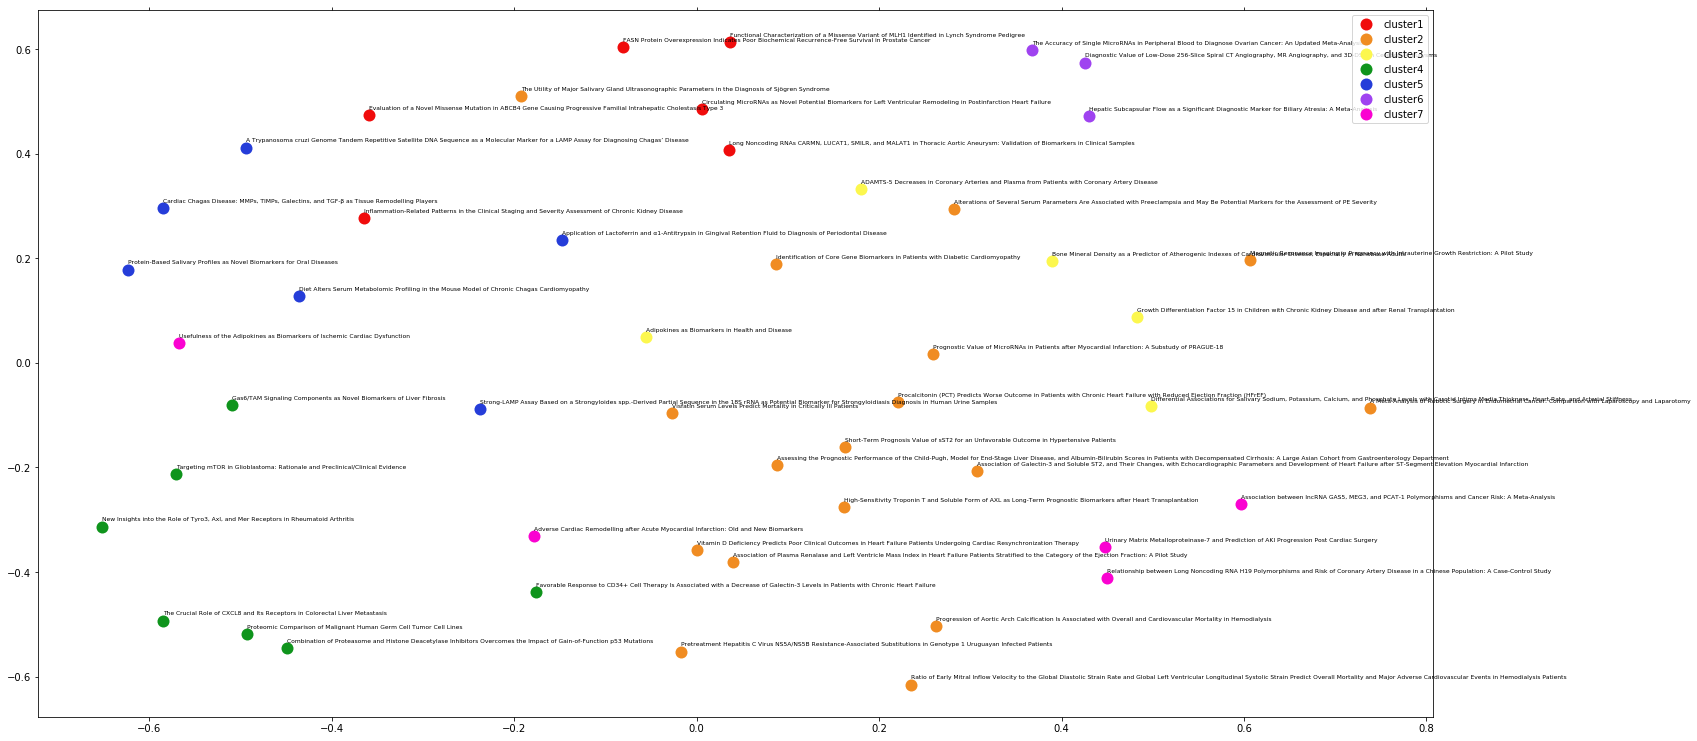

In [ ]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=dm_title_list)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(25, 13)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=6)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.pdf',bbox_inches='tight')

## Algorithms for Molecular Biology 의 최근 3년간 논문 요약본 50개
### 직접 다운 받은 후 클러스터링

In [ ]:
import os
amb_file_list=[]
for file in os.listdir('C:/Users/judy9/Desktop/Algorithms for Molecular Biology'):
    amb_file_list.append(file)
    print(file)
amb_file_list

amb-1.txt
amb-10.txt
amb-11.txt
amb-12.txt
amb-13.txt
amb-14.txt
amb-15.txt
amb-16.txt
amb-17.txt
amb-18.txt
amb-19.txt
amb-2.txt
amb-20.txt
amb-21.txt
amb-22.txt
amb-23.txt
amb-24.txt
amb-25.txt
amb-26.txt
amb-27.txt
amb-28.txt
amb-29.txt
amb-3.txt
amb-30.txt
amb-31.txt
amb-32.txt
amb-33.txt
amb-34.txt
amb-35.txt
amb-36.txt
amb-37.txt
amb-38.txt
amb-39.txt
amb-4.txt
amb-40.txt
amb-41.txt
amb-42.txt
amb-43.txt
amb-44.txt
amb-45.txt
amb-46.txt
amb-47.txt
amb-48.txt
amb-49.txt
amb-5.txt
amb-50.txt
amb-6.txt
amb-7.txt
amb-8.txt
amb-9.txt


['amb-1.txt',
 'amb-10.txt',
 'amb-11.txt',
 'amb-12.txt',
 'amb-13.txt',
 'amb-14.txt',
 'amb-15.txt',
 'amb-16.txt',
 'amb-17.txt',
 'amb-18.txt',
 'amb-19.txt',
 'amb-2.txt',
 'amb-20.txt',
 'amb-21.txt',
 'amb-22.txt',
 'amb-23.txt',
 'amb-24.txt',
 'amb-25.txt',
 'amb-26.txt',
 'amb-27.txt',
 'amb-28.txt',
 'amb-29.txt',
 'amb-3.txt',
 'amb-30.txt',
 'amb-31.txt',
 'amb-32.txt',
 'amb-33.txt',
 'amb-34.txt',
 'amb-35.txt',
 'amb-36.txt',
 'amb-37.txt',
 'amb-38.txt',
 'amb-39.txt',
 'amb-4.txt',
 'amb-40.txt',
 'amb-41.txt',
 'amb-42.txt',
 'amb-43.txt',
 'amb-44.txt',
 'amb-45.txt',
 'amb-46.txt',
 'amb-47.txt',
 'amb-48.txt',
 'amb-49.txt',
 'amb-5.txt',
 'amb-50.txt',
 'amb-6.txt',
 'amb-7.txt',
 'amb-8.txt',
 'amb-9.txt']

In [ ]:
import os
amb_title_list=[]
for file in os.listdir('C:/Users/judy9/Desktop/Algorithms for Molecular Biology'):
    f=open('C:/Users/judy9/Desktop/Algorithms for Molecular Biology/'+file,'r',encoding='utf-8-sig')
    title=f.readline()
    print(title)
    amb_title_list.append(title)
f.close()
amb_title_list

Fast computation of genome-metagenome interaction effects

Non-parametric correction of estimated gene trees using TRACTION

KOHDISTA: an efficient method to index and query possible Rmap alignments

Adjacency-constrained hierarchical clustering of a band similarity matrix with application to genomics

Super short operations on both gene order and intergenic sizes

Bayesian localization of CNV candidates in WGS data within minutes

Implications of non-uniqueness in phylogenetic deconvolution of bulk DNA samples of tumors

A branching process for homology distribution-based inference of polyploidy, speciation and loss

A multi-labeled tree dissimilarity measure for comparing “clonal trees” of tumor progression

A cubic algorithm for the generalized rank median of three genomes

A general framework for genome rearrangement with biological constraints

Evolution through segmental duplications and losses: a Super-Reconciliation approach

Differentially mutated subnetworks discovery

Repair

['Fast computation of genome-metagenome interaction effects\n',
 'Non-parametric correction of estimated gene trees using TRACTION\n',
 'KOHDISTA: an efficient method to index and query possible Rmap alignments\n',
 'Adjacency-constrained hierarchical clustering of a band similarity matrix with application to genomics\n',
 'Super short operations on both gene order and intergenic sizes\n',
 'Bayesian localization of CNV candidates in WGS data within minutes\n',
 'Implications of non-uniqueness in phylogenetic deconvolution of bulk DNA samples of tumors\n',
 'A branching process for homology distribution-based inference of polyploidy, speciation and loss\n',
 'A multi-labeled tree dissimilarity measure for comparing “clonal trees” of tumor progression\n',
 'A cubic algorithm for the generalized rank median of three genomes\n',
 'A general framework for genome rearrangement with biological constraints\n',
 'Evolution through segmental duplications and losses: a Super-Reconciliation appro

In [ ]:
amb_content_list=[]
for file in os.listdir('C:/Users/judy9/Desktop/Algorithms for Molecular Biology'):
    f=open('C:/Users/judy9/Desktop/Algorithms for Molecular Biology/'+file,'r',encoding='utf-8-sig')
    content=f.read()
    print(content)
    f=open('amb_content_list.txt','a',encoding='utf-8')
    f.write(content+'\n BREAKS HERE')
    amb_content_list.append(content+'\n BREAKS HERE')
f.close()
amb_content_list

Fast computation of genome-metagenome interaction effects

Motivation
Association studies have been widely used to search for associations between common genetic variants observations and a given phenotype. However, it is now generally accepted that genes and environment must be examined jointly when estimating phenotypic variance. In this work we consider two types of biological markers: genotypic markers, which characterize an observation in terms of inherited genetic information, and metagenomic marker which are related to the environment. Both types of markers are available in their millions and can be used to characterize any observation uniquely.

Objective
Our focus is on detecting interactions between groups of genetic and metagenomic markers in order to gain a better understanding of the complex relationship between environment and genome in the expression of a given phenotype.

Contributions
We propose a novel approach for efficiently detecting interactions between complement

Genomic DNA frequently undergoes rearrangement of the gene order that can be localized by comparing the two DNA sequences. In mitochondrial genomes different mechanisms are likely at work, at least some of which involve the duplication of sequence around the location of the apparent breakpoints. We hypothesize that these different mechanisms of genome rearrangement leave distinctive sequence footprints. In order to study such effects it is important to locate the breakpoint positions with precision. We define a partially local sequence alignment problem that assumes that following a rearrangement of a sequence F, two fragments L, and R are produced that may exactly fit together to match F, leave a gap of deleted DNA between L and R, or overlap with each other. We show that this alignment problem can be solved by dynamic programming in cubic space and time. We apply the new method to evaluate rearrangements of animal mitogenomes and find that a surprisingly large fraction of these event

['Fast computation of genome-metagenome interaction effects\n\nMotivation\nAssociation studies have been widely used to search for associations between common genetic variants observations and a given phenotype. However, it is now generally accepted that genes and environment must be examined jointly when estimating phenotypic variance. In this work we consider two types of biological markers: genotypic markers, which characterize an observation in terms of inherited genetic information, and metagenomic marker which are related to the environment. Both types of markers are available in their millions and can be used to characterize any observation uniquely.\n\nObjective\nOur focus is on detecting interactions between groups of genetic and metagenomic markers in order to gain a better understanding of the complex relationship between environment and genome in the expression of a given phenotype.\n\nContributions\nWe propose a novel approach for efficiently detecting interactions between

In [ ]:
len(amb_content_list)

50

In [ ]:
amb_title_list

['Fast computation of genome-metagenome interaction effects\n',
 'Non-parametric correction of estimated gene trees using TRACTION\n',
 'KOHDISTA: an efficient method to index and query possible Rmap alignments\n',
 'Adjacency-constrained hierarchical clustering of a band similarity matrix with application to genomics\n',
 'Super short operations on both gene order and intergenic sizes\n',
 'Bayesian localization of CNV candidates in WGS data within minutes\n',
 'Implications of non-uniqueness in phylogenetic deconvolution of bulk DNA samples of tumors\n',
 'A branching process for homology distribution-based inference of polyploidy, speciation and loss\n',
 'A multi-labeled tree dissimilarity measure for comparing “clonal trees” of tumor progression\n',
 'A cubic algorithm for the generalized rank median of three genomes\n',
 'A general framework for genome rearrangement with biological constraints\n',
 'Evolution through segmental duplications and losses: a Super-Reconciliation appro

In [ ]:
data=open('amb_title_list.txt','r',encoding='utf-8')
lines=data.read()
data.close()
print(lines)

'Fast computation of genome-metagenome interaction effects\n',
 'Non-parametric correction of estimated gene trees using TRACTION\n',
 'KOHDISTA: an efficient method to index and query possible Rmap alignments\n',
 'Adjacency-constrained hierarchical clustering of a band similarity matrix with application to genomics\n',
 'Super short operations on both gene order and intergenic sizes\n',
 Bayesian localization of CNV candidates in WGS data within minutes\n,
 Implications of non-uniqueness in phylogenetic deconvolution of bulk DNA samples of tumors\n,
 A branching process for homology distribution-based inference of polyploidy, speciation and loss\n,
 A multi-labeled tree dissimilarity measure for comparing “clonal trees” of tumor progression\n,
 A cubic algorithm for the generalized rank median of three genomes\n,
 A general framework for genome rearrangement with biological constraints\n,
 Evolution through segmental duplications and losses: a Super-Reconciliation approach\n,
 Differ

In [ ]:
data=open('amb_content_list.txt','r',encoding='utf-8')
lines=data.read()
data.close()
print(lines)

Fast computation of genome-metagenome interaction effects

Motivation
Association studies have been widely used to search for associations between common genetic variants observations and a given phenotype. However, it is now generally accepted that genes and environment must be examined jointly when estimating phenotypic variance. In this work we consider two types of biological markers: genotypic markers, which characterize an observation in terms of inherited genetic information, and metagenomic marker which are related to the environment. Both types of markers are available in their millions and can be used to characterize any observation uniquely.

Objective
Our focus is on detecting interactions between groups of genetic and metagenomic markers in order to gain a better understanding of the complex relationship between environment and genome in the expression of a given phenotype.

Contributions
We propose a novel approach for efficiently detecting interactions between complement

In [ ]:
content=lines.split('\n BREAKS HERE')

In [ ]:
content

['Fast computation of genome-metagenome interaction effects\n\nMotivation\nAssociation studies have been widely used to search for associations between common genetic variants observations and a given phenotype. However, it is now generally accepted that genes and environment must be examined jointly when estimating phenotypic variance. In this work we consider two types of biological markers: genotypic markers, which characterize an observation in terms of inherited genetic information, and metagenomic marker which are related to the environment. Both types of markers are available in their millions and can be used to characterize any observation uniquely.\n\nObjective\nOur focus is on detecting interactions between groups of genetic and metagenomic markers in order to gain a better understanding of the complex relationship between environment and genome in the expression of a given phenotype.\n\nContributions\nWe propose a novel approach for efficiently detecting interactions between

In [ ]:
len(content) #마지막은 비어있는 스트링

51

In [ ]:
# generates index for each item in the corpora (in this case it's just rank) and I'll use this for scoring later
ranks = []

for i in range(0,len(amb_title_list)):
    ranks.append(i)
    
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

# import these modules 
from nltk.stem import WordNetLemmatizer 
  
stemmer = WordNetLemmatizer() 

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.lemmatize(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

totalvocab_stemmed = []
totalvocab_tokenized = []
for i in amb_content_list:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)
    
print(totalvocab_tokenized[:20])
print(totalvocab_stemmed[:20])

['fast', 'computation', 'of', 'genome-metagenome', 'interaction', 'effects', 'motivation', 'association', 'studies', 'have', 'been', 'widely', 'used', 'to', 'search', 'for', 'associations', 'between', 'common', 'genetic']
['Fast', 'computation', 'of', 'genome-metagenome', 'interaction', 'effect', 'Motivation', 'Association', 'study', 'have', 'been', 'widely', 'used', 'to', 'search', 'for', 'association', 'between', 'common', 'genetic']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(amb_content_list)

print(tfidf_matrix.shape)

C:\Users\judy9\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Wall time: 661 ms
(50, 51)


In [ ]:
terms = tfidf_vectorizer.get_feature_names()
terms

['accurate',
 'algorithm',
 'alignment',
 'approach',
 'available',
 'based',
 'biological',
 'case',
 'common',
 'computational',
 'data',
 'datasets',
 'demonstrate',
 'different',
 'distance',
 'evolutionary',
 'gene',
 'genome',
 'given',
 'graph',
 'ha',
 'important',
 'inference',
 'introduce',
 'known',
 'large',
 'method',
 'model',
 'multiple',
 'new',
 'number',
 'order',
 'present',
 'problem',
 'propose',
 'provide',
 'result',
 'sequence',
 'sequencing',
 'set',
 'single',
 'solution',
 'specie',
 'structure',
 'study',
 'time',
 'tree',
 'use',
 'used',
 'using',
 'variant']

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

from sklearn.cluster import KMeans

num_clusters = 7

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 190 ms


In [ ]:
import pandas as pd

ambs = { 'title': amb_title_list, 'rank': ranks, 'content': amb_content_list, 'cluster': clusters}

frame = pd.DataFrame(ambs, index = [clusters] , columns = ['rank', 'title', 'cluster'])

frame['cluster'].value_counts()

grouped = frame['rank'].groupby(frame['cluster'])

grouped.mean()

cluster
0    21.000000
1    36.000000
2    33.125000
3    25.555556
4    10.625000
5    18.375000
6    26.250000
Name: rank, dtype: float64